In [1]:
from PIL import Image
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

PTL 라이브러리 import 완료!


In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

# 본래 네트워크에 따라 reshape하는 과정이 필요 할 수 있으나 본 프로그램은 필요없음. 
# reshape를 한다는 건 x_train shape: (570, 28, 28, 3)에 맽긑에 3 RGB값을 불러올 수있음
# 본래라면 570의 데이터 개수에 28*28이라는 사이즈로 조절한다는 것임.

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [5]:
#데이터 준비(2) 이미지라는 입력값에 라벨링이라는 출력을 설정 하는 과정 + 정규화

def load_data(img_path, number_of_data=300): 
    # 가위 : 0, 바위 : 1, 보 : 2 # load_data는 데이터를 행렬로 바꿔주는 과정임.
    img_size=28
    color=3
   
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

# x-train은 입력값이며 뒤에 3은 RGB를 나타냄, Y-train은 출력 값으로서 개수만 보여줌

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [6]:
# #훈련용 데이터로 성능확인

# train_loss, train_accuracy = model.evaluate(x_train,y_train, verbose=2)
# print("train_loss: {} ".format(train_loss))
# print("train_accuracy: {}".format(train_accuracy))

라벨:  0


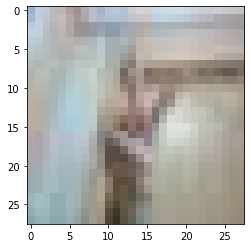

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [8]:
#딥러닝 네트워크 설계하기
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))


model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

In [9]:
# 최선의 답을 찾아 가는 과정 LMS 1-4 딥러닝 네트워크 학습 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', #오류제거
             metrics=['accuracy']) #평가지표

model.fit(x_train_norm, y_train, epochs=10) #학습을 시키는 부분

Epoch 1/10
10/10 [==============================] - 3s 12ms/step - loss: 1.9722 - accuracy: 0.2733
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.3466 - accuracy: 0.3233
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1051 - accuracy: 0.3533
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0270 - accuracy: 0.5200
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9748 - accuracy: 0.6900
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9300 - accuracy: 0.6300
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8534 - accuracy: 0.6233
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8240 - accuracy: 0.5300
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.7167
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.7867


In [10]:
# 원진님이 하실 부분
# 테스트 데이터 생성
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

#테스트 리사이징하기- 가위
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")


(x_test, y_test)=load_data(test_image_dir_path, number_of_data= 3307)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화


1100  images to be resized.
1100  images resized.
가위 이미지 resize 완료!
1100  images to be resized.
1100  images resized.
바위 이미지 resize 완료!
1101  images to be resized.
1101  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 3301 입니다.


In [11]:
# plt.imshow(x_test[idx],cmap=plt.cm.binary)
# plt.show()

In [12]:

#테스트 데이터로 성능확인

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))



104/104 - 0s - loss: 289.1254 - accuracy: 0.3199
test_loss: 289.1253662109375 
test_accuracy: 0.3199274241924286


In [13]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


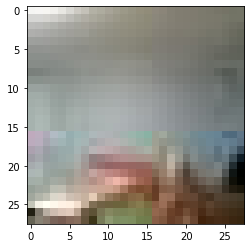

In [14]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 0, 예측결과: 1


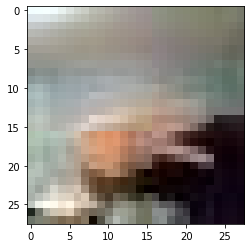

예측확률분포: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 0, 예측결과: 1


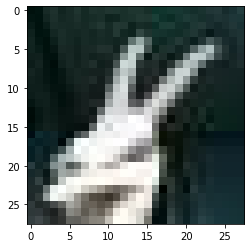

예측확률분포: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 2, 예측결과: 1


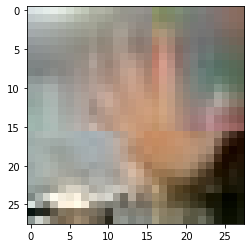

예측확률분포: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 0, 예측결과: 1


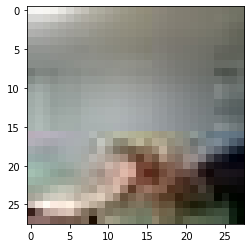

예측확률분포: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
라벨: 2, 예측결과: 1


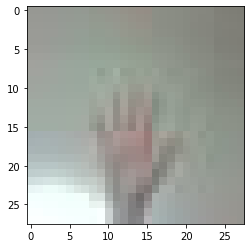

In [15]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
   
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)


samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [16]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

ValueError: in user code:

    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.9/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.9/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 28, 28, 3)


### <회고>
1. train값을 확인하여 예측결과를 확인하였을 때 형편없다는 것을 확인하였고 그에 따른 문제로 학습데이터의 부족과 뒤에 사물의 존재로 인식하지 못했다고 생각하여 샘플을 전면교체하고 테스트샘플을 현저하게 늘렸음. 또한 해상도의 문제라고 생각하여 사이즈를 변경하였음.
2. reshape문제가 계속 발생하여 test값에도 reshape가 필요하다는 것을 깨닫고 값을 조정하였음에도 에러
3. 표준화와 random을 했음에도 에러가 계속 발생함.

